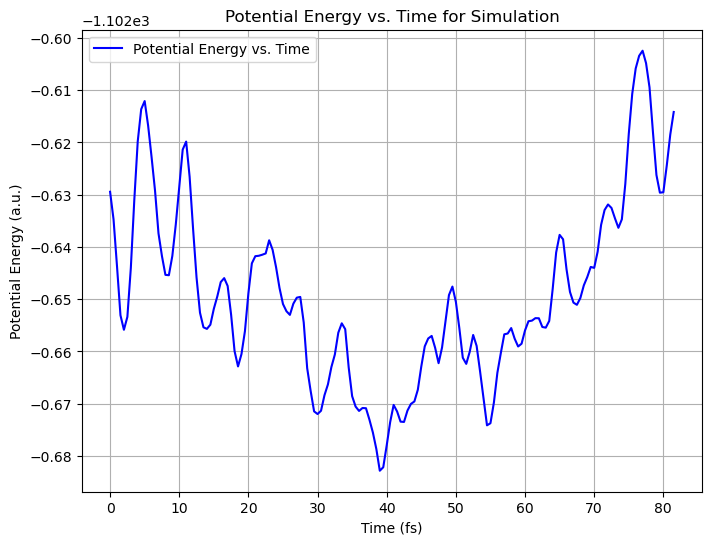

In [1]:
### Jialong Wang ###
### Nov 21, 2024 ###

import numpy as np
import matplotlib.pyplot as plt
import os

# Define file paths
energy_file = "../Runs/Water/water_aimd_1ns_every0.5fs-1.ener"  ######## Path to .ener file #TEMP NOW
output_dir = "../Figures"  # Directory to store figures

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the energy data from the .ener file
data = np.loadtxt(energy_file, skiprows=1)  # Skip the header

# Extract time and potential energy columns
time = data[:, 1]  # 2nd column: Time[fs] (index 1)
energy = data[:, 4]  # 5th column: Potential Energy (index 4)

# Plot energy vs. time
plt.figure(figsize=(8, 6))
plt.plot(time, energy, label="Potential Energy vs. Time", color='blue')
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.title("Potential Energy vs. Time for Simulation")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "energy_vs_time.png"))  # Save the plot
plt.show()



In [2]:
def xyz_to_pdb(xyz_file, pdb_file):
    with open(xyz_file, "r") as xyz, open(pdb_file, "w") as pdb:
        lines = xyz.readlines()
        
        # First line is the number of atoms
        num_atoms = int(lines[0].strip())
        pdb.write("MODEL        1\n")  # Start the PDB model
        
        # Loop through the atoms
        for idx, line in enumerate(lines[2:2 + num_atoms]):  # Skip first two lines (atom count and comment)
            parts = line.split()
            atom_type = parts[0]  # Atom name (O, H, etc.)
            x, y, z = map(float, parts[1:4])  # Coordinates
            
            # Write PDB ATOM format
            pdb.write(f"ATOM  {idx+1:5d}  {atom_type:<2}    WAT     1     {x:8.3f}{y:8.3f}{z:8.3f}  1.00  0.00           {atom_type:>2}\n")
        
        pdb.write("ENDMDL\n")  # End the PDB model

# Convert the trajectory file to PDB format
xyz_to_pdb("../Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz", "../Runs/Water/water_TEMP.pdb")


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:287: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


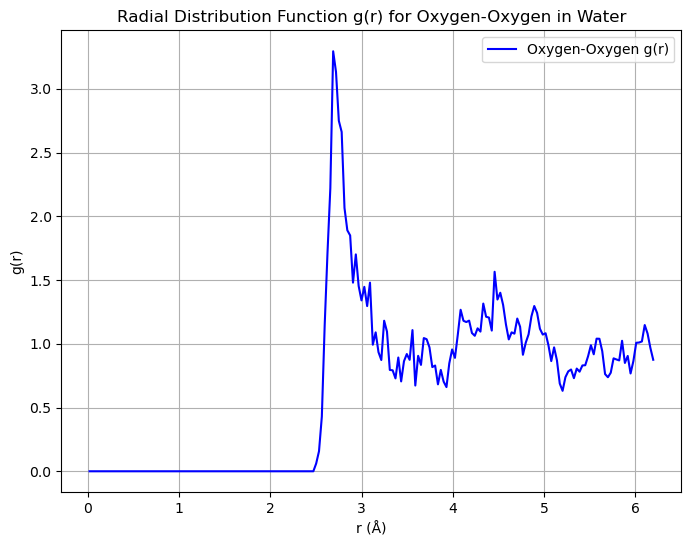

In [3]:
# Updated Block 2: Compute g(r) for Oxygen-Oxygen in Water using MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os

# Define file paths
trajectory_file = "../Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz"  # MD trajectory file
topology_file = "../Runs/Water/water_TEMP.pdb"  # Fixed PDB topology file
output_dir = "../Figures"  # Directory to store figures

# Box size (from the input file, constant throughout the simulation)
box_size = 12.42  # Box size in Ångstroms

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load the trajectory and topology using MDAnalysis
u = mda.Universe(topology_file, trajectory_file)

# Manually set the box dimensions (cubic box)
u.dimensions = [box_size, box_size, box_size, 90, 90, 90]

# Select oxygen atoms from the water molecules
oxygen_atoms = u.select_atoms("name O")  # Select all oxygen atoms in the system

# Define the RDF analysis for oxygen-oxygen pairs
rdf = InterRDF(oxygen_atoms, oxygen_atoms, nbins=200, range=(0.005, box_size / 2)) #Instead of 0, I should use .005

# Run the RDF analysis
rdf.run()

# Use updated attributes
r_bins = rdf.results.bins
g_r = rdf.results.rdf

# Plot the RDF
plt.figure(figsize=(8, 6))
plt.plot(r_bins, g_r, label="Oxygen-Oxygen g(r)", color='blue')
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function g(r) for Oxygen-Oxygen in Water")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "gr_oxygen_oxygen_water.png"))  # Save the plot
plt.show()
